In [1]:
import pandas as pd

data = pd.read_csv('data/^NDX_raw_data.csv')
data.rename(columns={'Date': 'date', 'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace=True)

data_backup = data.iloc[3524:]

data = data.iloc[:3524]
data_copy = data.copy()

In [2]:
data

,date,open,high,low,close,volume
0,2004-01-02 00:00:00-05:00,1474.160034,1479.589966,1458.510010,1463.569946,1666780000
1,2004-01-05 00:00:00-05:00,1474.550049,1496.579956,1474.189941,1496.579956,2362910000
2,2004-01-06 00:00:00-05:00,1492.410034,1504.469971,1486.589966,1501.260010,2273220000
3,2004-01-07 00:00:00-05:00,1498.380005,1514.449951,1491.199951,1514.260010,2294280000
4,2004-01-08 00:00:00-05:00,1524.060059,1530.650024,1513.339966,1530.650024,2683950000
...,...,...,...,...,...,...
3519,2017-12-22 00:00:00-05:00,6462.549805,6467.830078,6449.000000,6465.169922,1541880000
3520,2017-12-26 00:00:00-05:00,6427.319824,6438.240234,6407.990234,6433.160156,1301000000
3521,2017-12-27 00:00:00-05:00,6437.060059,6448.939941,6425.919922,6435.149902,1411010000
3522,2017-12-28 00:00:00-05:00,6449.529785,6452.069824,6432.680176,6441.419922,1319870000


#### slice the data:

In [3]:
import numpy as np

## Creating sequences
def create_dataset(dataset, time_step=1, output_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-output_step):
        a = dataset[i:(i+time_step), 0]
        b = dataset[(i+time_step):(i+time_step)+output_step, 0]
        dataX.append(a)
        dataY.append(b)

    return np.array(dataX), np.array(dataY)

In [4]:
period = 60
output_step = 7

In [5]:
X, y = create_dataset(data[['close']].to_numpy(), time_step=period, output_step=output_step)

In [6]:
X.shape, y.shape

((3457, 60), (3457, 7))

In [7]:
X[0],y[0]

(array([1463.56994629, 1496.57995605, 1501.26000977, 1514.26000977,
        1530.65002441, 1520.45996094, 1539.77001953, 1524.7800293 ,
        1534.07995605, 1532.01000977, 1553.61999512, 1552.86999512,
        1546.59997559, 1530.42004395, 1531.20996094, 1553.66003418,
        1519.22998047, 1491.56994629, 1496.40002441, 1493.07995605,
        1487.83996582, 1491.84997559, 1462.60998535, 1465.0300293 ,
        1498.94995117, 1490.91003418, 1500.29003906, 1514.18005371,
        1501.33996582, 1484.4699707 , 1506.56994629, 1507.48999023,
        1484.80004883, 1482.09997559, 1463.75      , 1462.05004883,
        1470.2199707 , 1477.13000488, 1470.38000488, 1489.48999023,
        1473.2199707 , 1466.08996582, 1481.35998535, 1472.98999023,
        1441.11999512, 1437.4699707 , 1417.5       , 1402.19995117,
        1431.40002441, 1399.86999512, 1407.06994629, 1428.89001465,
        1417.77001953, 1398.57995605, 1381.39001465, 1370.04003906,
        1381.85998535, 1425.85998535, 1415.39001

In [8]:
data_input = np.array([np.concatenate((X[i], y[i]), axis=0) for i in range(X.shape[0])])

In [9]:
data_input, data_input.shape

(array([[1463.56994629, 1496.57995605, 1501.26000977, ..., 1508.36999512,
         1493.57995605, 1481.95996094],
        [1496.57995605, 1501.26000977, 1514.26000977, ..., 1493.57995605,
         1481.95996094, 1485.51000977],
        [1501.26000977, 1514.26000977, 1530.65002441, ..., 1481.95996094,
         1485.51000977, 1495.93005371],
        ...,
        [5934.91015625, 5932.31982422, 5867.35009766, ..., 6472.68994141,
         6465.16992188, 6433.16015625],
        [5932.31982422, 5867.35009766, 5881.33984375, ..., 6465.16992188,
         6433.16015625, 6435.14990234],
        [5867.35009766, 5881.33984375, 5937.79003906, ..., 6433.16015625,
         6435.14990234, 6441.41992188]]),
 (3457, 67))

#### seasonal_decomposition for each slice:

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompositions = np.array([seasonal_decompose(data_input[i], model='additive', period=14) for i in range(data_input.shape[0])])
trends = np.array([decompositions[i].trend for i in range(decompositions.shape[0])])

In [11]:
trends

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [12]:
trends[0]

array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan, 1526.76785278,
       1531.22214181, 1533.9025007 , 1533.73392596, 1531.70035226,
       1529.49928066, 1526.66677856, 1523.63606044, 1519.90748814,
       1514.96284703, 1510.6182033 , 1506.45284598, 1502.58606393,
       1500.35213797, 1498.70535278, 1495.16749355, 1492.24427577,
       1492.36070469, 1492.51499285, 1491.70856585, 1490.45606777,
       1488.53142875, 1487.73893084, 1488.44285801, 1487.85464478,
       1486.7835737 , 1485.76606968, 1483.08177839, 1480.65070452,
       1479.52713449, 1476.77963693, 1471.94142369, 1467.03713553,
       1461.77999006, 1457.77106149, 1454.39498901, 1449.91891479,
       1445.94069999, 1442.33891514, 1437.21320016, 1430.68677194,
       1423.97677612, 1416.99285017, 1411.75606428, 1409.15392194,
       1408.40785435, 1409.57178606, 1411.85607474, 1413.92857579,
       1417.93750436, 1424.78500802, 1430.71322196, 1435.31607

In [13]:
trends.shape

(3457, 67)

In [14]:
trends_dropna = list()

for trend in trends:
    trends_dropna.append(trend[~np.isnan(trend)])

trends_dropna = np.array(trends_dropna)

In [15]:
trends_dropna.shape

(3457, 53)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = list(MinMaxScaler() for i in range(trends_dropna.shape[0]))
trends_scaled = list()

for i in range(trends_dropna.shape[0]):
    trends_scaled.append(scaler[i].fit_transform(trends_dropna[i].reshape(-1,1)))

trends_scaled = np.array(trends_scaled)

In [17]:
trends.shape, trends_dropna.shape, trends_scaled.shape

((3457, 67), (3457, 53), (3457, 53, 1))

In [18]:
trends_scaled[0], trends_scaled[0].shape

(array([[0.94314779],
        [0.97864165],
        [1.        ],
        [0.99865672],
        [0.98245225],
        [0.96491308],
        [0.94234238],
        [0.91819221],
        [0.8884812 ],
        [0.84907999],
        [0.81445983],
        [0.78126832],
        [0.75045599],
        [0.73265503],
        [0.71953267],
        [0.69134136],
        [0.66804779],
        [0.66897555],
        [0.67020499],
        [0.66377901],
        [0.65379851],
        [0.63846209],
        [0.6321471 ],
        [0.63775632],
        [0.63306916],
        [0.62453437],
        [0.61642642],
        [0.59503673],
        [0.5756648 ],
        [0.56671167],
        [0.54481832],
        [0.50626518],
        [0.46718552],
        [0.42529412],
        [0.39334911],
        [0.36644698],
        [0.33077953],
        [0.29907926],
        [0.27037855],
        [0.22953446],
        [0.17752883],
        [0.12406045],
        [0.06840926],
        [0.0266801 ],
        [0.00594502],
        [0

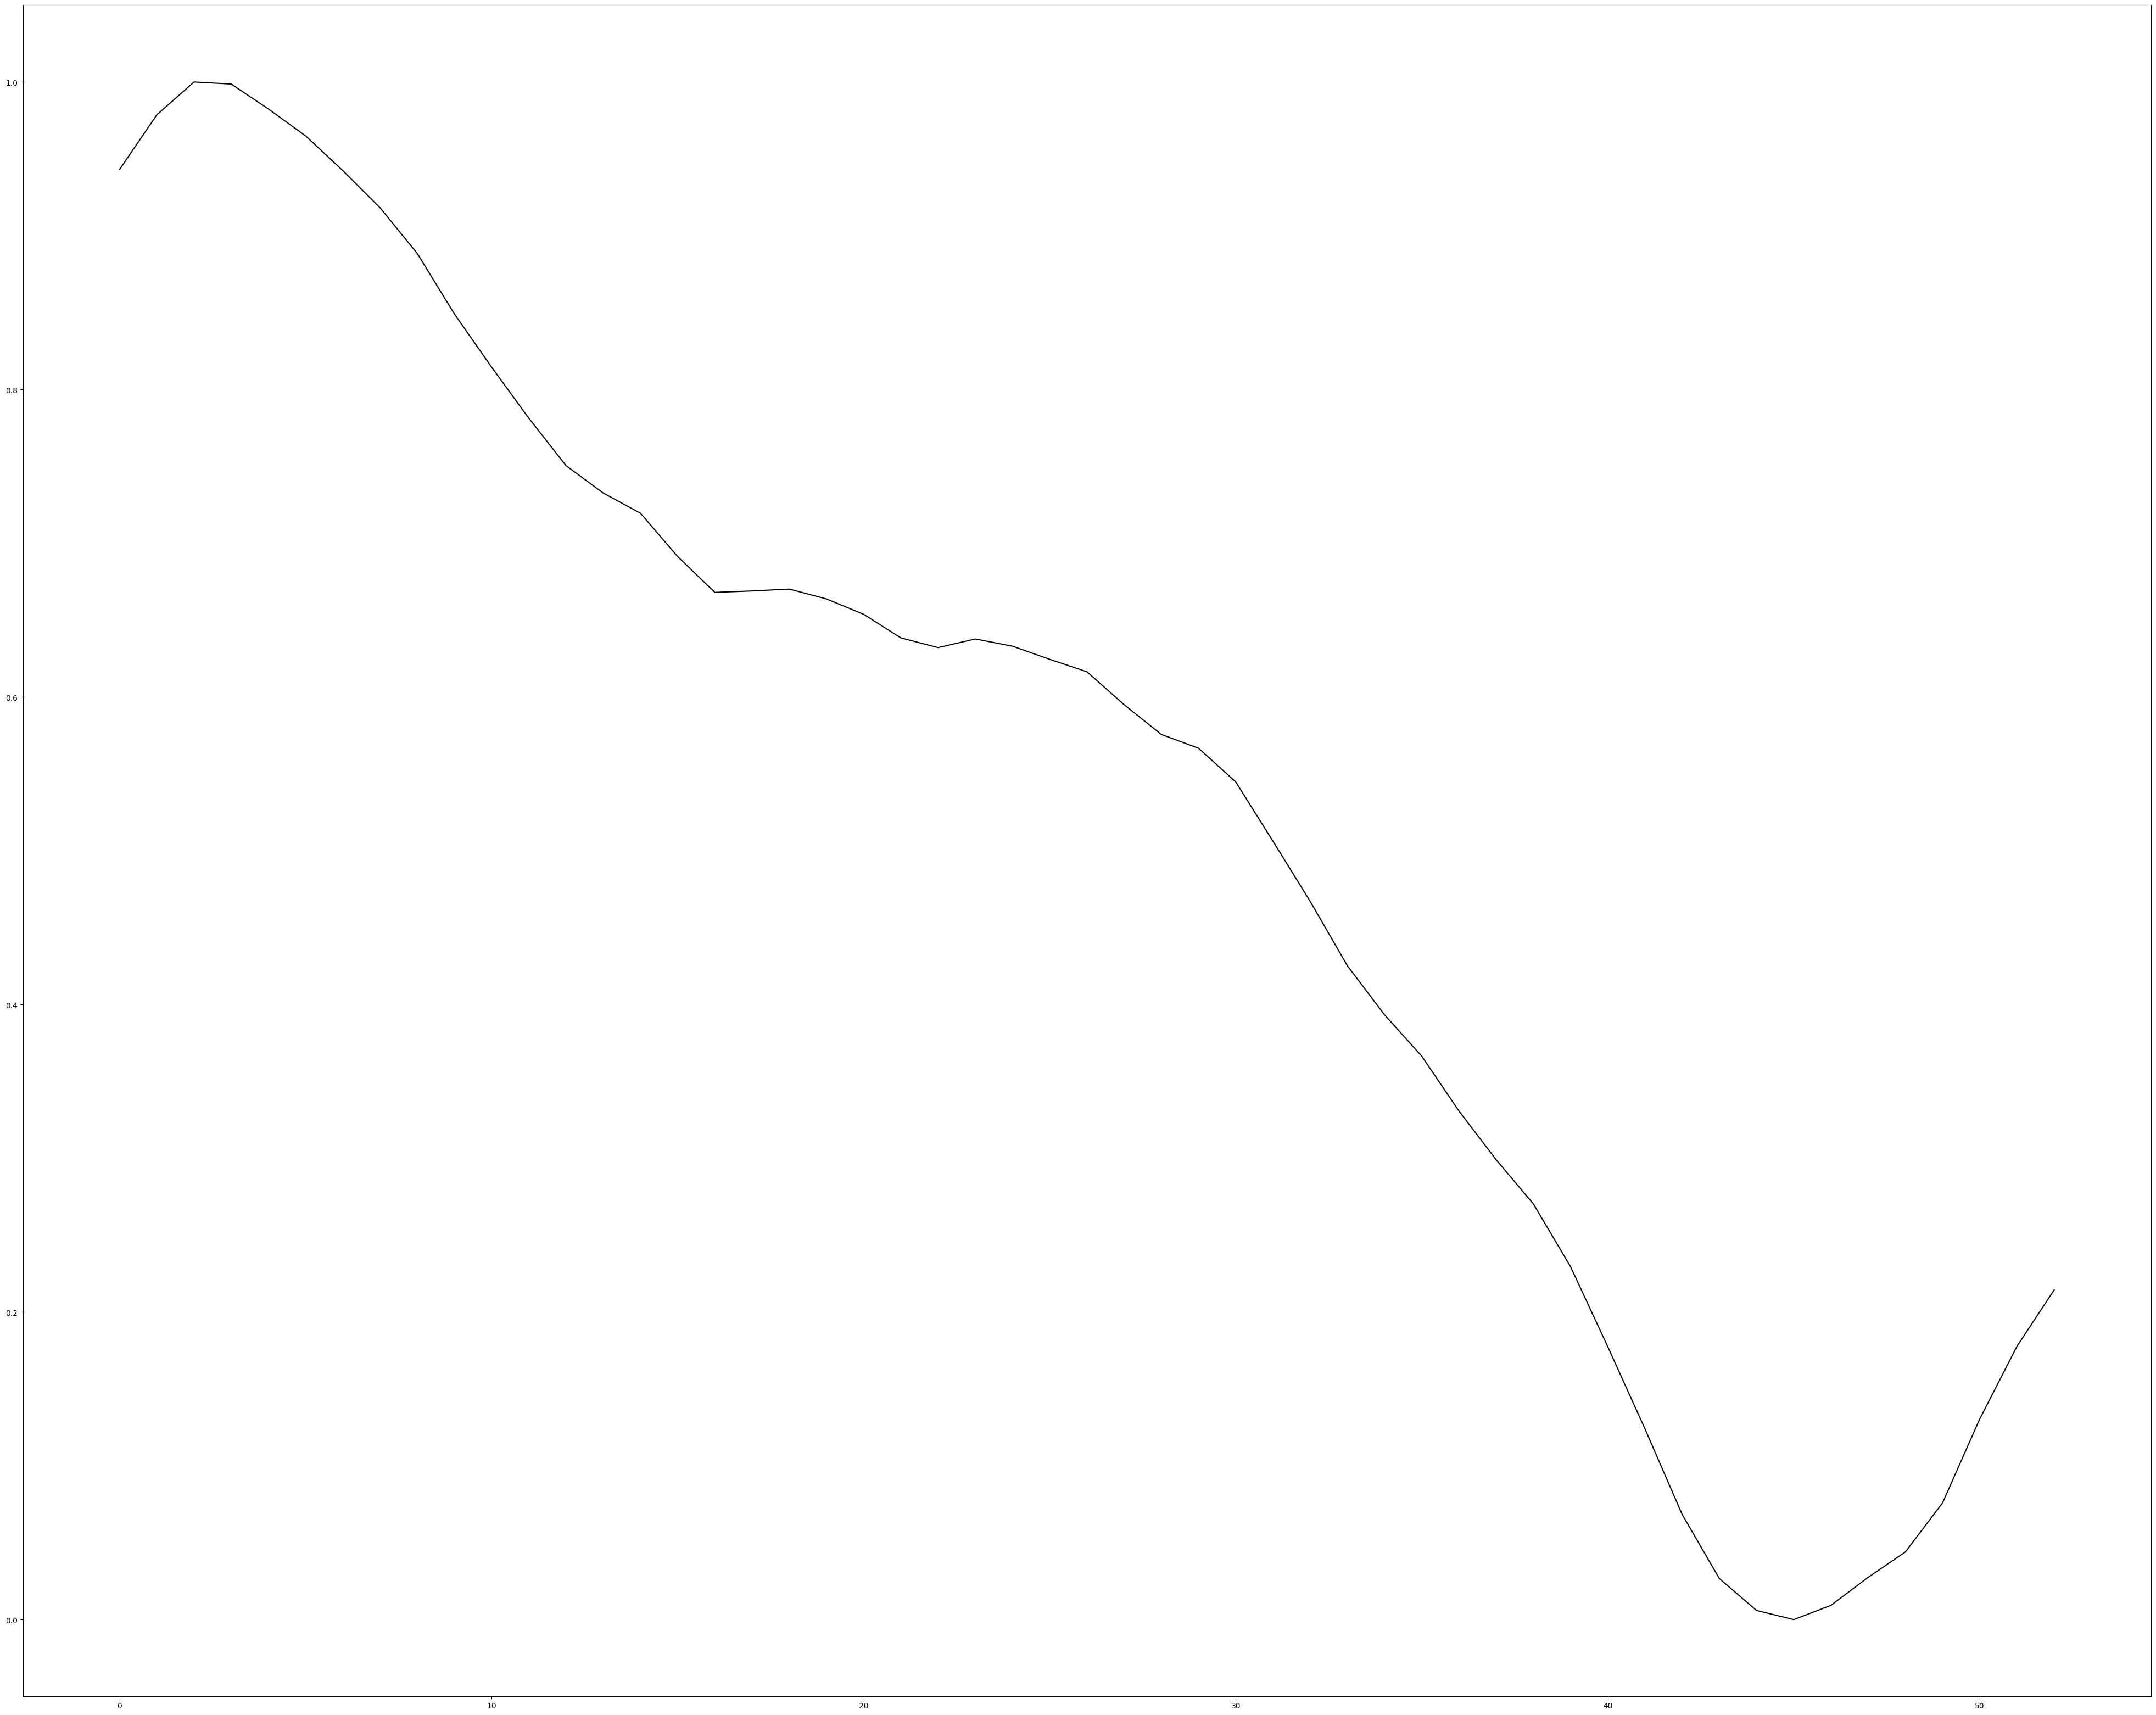

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 40))

plt.plot(trends_scaled[0], color='black')

In [20]:
X_input = list()
y_input = list()

for trend in trends_scaled:
    X_input.append(trend[:trend.shape[0]-7])
    y_input.append(trend[trend.shape[0]-7:])

X_input = np.array(X_input)
y_input = np.array(y_input)

In [21]:
X_input.shape, y_input.shape

((3457, 46, 1), (3457, 7, 1))

In [22]:
num_features = trends_scaled.shape[2]
input_period = X_input.shape[1]
output_step = y_input.shape[1]
units = 1024

In [23]:
y_input

array([[[0.00927475],
        [0.02747703],
        [0.04399169],
        ...,
        [0.13050082],
        [0.17773959],
        [0.21441728]],

       [[0.02747703],
        [0.04399169],
        [0.07593671],
        ...,
        [0.17773959],
        [0.21441728],
        [0.25742423]],

       [[0.04399169],
        [0.07593671],
        [0.13050082],
        ...,
        [0.21441728],
        [0.25742423],
        [0.31476023]],

       ...,

       [[0.86323914],
        [0.87587603],
        [0.89762635],
        ...,
        [0.94095546],
        [0.96908778],
        [1.        ]],

       [[0.85025784],
        [0.87196069],
        [0.89501663],
        ...,
        [0.9432662 ],
        [0.97411096],
        [1.        ]],

       [[0.84844495],
        [0.87168622],
        [0.89202705],
        ...,
        [0.95141633],
        [0.97751347],
        [1.        ]]])

## model training:

In [24]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Build LSTM model
model = Sequential([
    LSTM(units=units, input_shape=(input_period, num_features)),
    #LSTM(units=units, return_sequences=True, input_shape=(input_period, num_features)),
    #Dropout(0.2),
    #LSTM(units=units, return_sequences=False),
    #Dropout(0.2),
    Dense(output_step)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define a ModelCheckpoint callback to save weights at the end of each epoch
checkpoint = ModelCheckpoint(filepath='model_weights_2/model_weights_epoch_{epoch:02d}.h5', 
                            save_best_only=True, save_weights_only=True)

# Adding early stopping to prevent overfitting
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

2024-05-11 08:48:24.935612: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-11 08:48:25.217894: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-11 08:48:25.218107: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-11 08:48:25.263570: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-11 08:48:25.433105: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-11 08:48:27.456529: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [ ]:
# SKIP IF MODEL IS LOADED FROM .h5 FILE

# Training the model with early stopping
history = model.fit(X_input, y_input, epochs=150, batch_size=64, validation_split=0.2, callbacks=[checkpoint])

In [ ]:
# Select the epoch
best_epoch = np.argmin(history.history['val_loss'])
best_epoch = best_epoch+1
print(f'best result is for epoch number {best_epoch}')

# Load the weights of the model at the chosen epoch
model.load_weights(f'model_weights_2/model_weights_epoch_{best_epoch:02d}.h5')
print('Weigths for the best epoch has been loaded.')

In [25]:
best_epoch_backup = 94

# Load the weights of the model at the chosen epoch
model.load_weights(f'model_weights_2/model_weights_epoch_{best_epoch_backup:02d}.h5')
print('Backup: Weigths for the best epoch has been loaded.')

Backup: Weigths for the best epoch has been loaded.


## data reading for all stocks:

In [26]:
import os
import re

directory = 'data-nasdaq-1h'

df_data = dict()

for file in os.listdir(directory):
    symbol_pattern = re.match(r'([^_]+)_', file)
    symbol = symbol_pattern.group(1)
    df_data[symbol] = pd.read_csv(os.path.join(directory, file))
    df_data[symbol].rename(columns={'Date': 'date', 'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'}, inplace=True)

df_data_copy = df_data.copy()

In [27]:
dict_X_test, dict_y_test = dict(), dict()

for symbol in df_data:
    X_test, y_test = create_dataset(df_data[symbol][['close']].to_numpy(), time_step=period, output_step=output_step)

    dict_X_test[symbol] = X_test
    dict_y_test[symbol] = y_test

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

dict_decompositions = dict()
dict_trends = dict()

for symbol in df_data:
    decompositions_test = np.array([seasonal_decompose(dict_X_test[symbol][i], model='additive', period=14) for i in range(dict_X_test[symbol].shape[0])])
    trends_test = np.array([decompositions_test[i].trend for i in range(decompositions_test.shape[0])])

    dict_decompositions[symbol] = decompositions_test
    dict_trends[symbol] = trends_test

In [29]:
dict_trends_dropna = dict()

for symbol in df_data:
    trends_test_dropna = list()
    
    for trend in dict_trends[symbol]:
        trends_test_dropna.append(trend[~np.isnan(trend)])

    trends_test_dropna = np.array(trends_test_dropna)

    dict_trends_dropna[symbol] = trends_test_dropna

In [30]:
from sklearn.preprocessing import MinMaxScaler

dict_scalers_trend = dict()
dict_scalers_target = dict()
dict_trends_scaled = dict()
dict_targets_scaled = dict()

for symbol in df_data:
    scaler_trend = list(MinMaxScaler() for i in range(dict_trends_dropna[symbol].shape[0]))
    trends_test_scaled = list()

    # we use target values only for comparison issue here
    scaler_target = list(MinMaxScaler() for i in range(dict_y_test[symbol].shape[0]))
    target_test_scaled = list()

    for i in range(dict_trends_dropna[symbol].shape[0]):
        trends_test_scaled.append(scaler_trend[i].fit_transform(dict_trends_dropna[symbol][i].reshape(-1,1)))

    for j in range(dict_y_test[symbol].shape[0]):
        target_test_scaled.append(scaler_target[j].fit_transform(dict_y_test[symbol][j].reshape(-1,1)))

    trends_test_scaled = np.array(trends_test_scaled)
    target_test_scaled = np.array(target_test_scaled)

    dict_scalers_trend[symbol] = scaler_trend
    dict_scalers_target[symbol] = scaler_target
    dict_trends_scaled[symbol] = trends_test_scaled
    dict_targets_scaled[symbol] = target_test_scaled

In [31]:
# EVALUATION CAN BE MADE HERE IF WANTED

In [32]:
dict_predictions = dict()

for nb, symbol in enumerate(df_data):
    trend_predictions = list()

    print(f'{nb+1} predicting for {symbol}')
    
    for j in range(dict_trends_scaled[symbol].shape[0]):
        #print(f'{j+1} for {symbol}')
        trend_predictions.append(
            dict_scalers_trend[symbol][j].inverse_transform(
                model.predict(dict_trends_scaled[symbol][j].reshape(dict_trends_scaled[symbol][j].shape[1], input_period, num_features), verbose=0)
            )
        )
    
    trend_predictions = np.array(trend_predictions)

    dict_predictions[symbol] = trend_predictions

1 predicting for VRTX
2 predicting for MDLZ
3 predicting for TMO
4 predicting for UNH


KeyboardInterrupt: 

In [ ]:
dict_observations = dict()

for symbol in df_data:
    observation_first_point = pd.Series([
        dict_predictions[symbol][i][0][0] for i in range(dict_predictions[symbol].shape[0])
    ], index=df_data[symbol].index[output_step:-period])

    dict_observations[symbol] = observation_first_point

## adding signal noise to trend predictions:

In [ ]:
dict_std_dev_noise = dict()

for symbol in df_data:
    noise_high, _ = create_dataset(df_data[symbol][['high']].to_numpy(), time_step=period, output_step=output_step)
    noise_low, _ = create_dataset(df_data[symbol][['low']].to_numpy(), time_step=period, output_step=output_step)

    std_dev_high = np.array([np.std(val) for val in noise_high])
    std_dev_low = np.array([np.std(val) for val in noise_low])
    
    std_dev_noise = np.array([np.maximum(val_high, val_low) for val_high, val_low in zip(std_dev_high, std_dev_low)])

    dict_std_dev_noise[symbol] = std_dev_noise

In [ ]:
dict_induced_gap = dict()

for symbol in df_data:
    induced_high_first_point = np.array([dict_observations[symbol][i+7] + dict_std_dev_noise[symbol][i] for i in range(dict_std_dev_noise[symbol].shape[0])])
    induced_low_first_point = np.array([dict_observations[symbol][i+7] - dict_std_dev_noise[symbol][i] for i in range(dict_std_dev_noise[symbol].shape[0])])
    
    induced_high_first_point = pd.Series(induced_high_first_point, index=df_data[symbol].index[7:-60])
    induced_low_first_point = pd.Series(induced_low_first_point, index=df_data[symbol].index[7:-60])

    dict_induced_gap[symbol] = {'induced_high':induced_high_first_point, 'induced_low':induced_low_first_point}

In [ ]:
data_output = df_data.copy()

In [ ]:
count = 0

for symbol in df_data:
    count += 1

    data_output[symbol]['pred'] = dict_observations[symbol]
    data_output[symbol]['induced_high'] = dict_induced_gap[symbol]['induced_high']
    data_output[symbol]['induced_low'] = dict_induced_gap[symbol]['induced_low']
    
    data_output[symbol]['pred'] = data_output[symbol]['pred'].shift(46)
    data_output[symbol]['induced_high'] = data_output[symbol]['induced_high'].shift(46)
    data_output[symbol]['induced_low'] = data_output[symbol]['induced_low'].shift(46)

    data_output[symbol].to_excel(f'data_w_pred_m5-nasdaq-1h/{symbol}_w_pred_m5.xlsx')
    
    print(f'{count} done for {symbol}')

In [ ]:
import pickle

# Pickle the object and save it to a file
with open('data_pred-nasdaq-1h.pickle', 'wb') as f:
    pickle.dump(dict_predictions, f)